In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("data/raw/Absenteeism_at_work.csv", sep=';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [6]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

What is hit target?  Documentation unhelpful.  May have to ignore this value.  Probably a percent, but percent of what?

In [8]:
df['Hit target'].value_counts()

93     105
99     102
97      89
92      79
96      75
95      75
98      66
91      45
94      34
88      28
81      19
87      12
100     11
Name: Hit target, dtype: int64

In [16]:
df['Day of the week'].value_counts()

2    161
4    156
3    154
6    144
5    125
Name: Day of the week, dtype: int64

In [14]:
df['Absenteeism time in hours'].value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
40       7
5        7
32       6
64       3
80       3
120      3
112      2
56       2
48       1
7        1
104      1
Name: Absenteeism time in hours, dtype: int64

In [11]:
len(df)

740

In [41]:
df[df['Absenteeism time in hours']>100][['Absenteeism time in hours','Day of the week','Hit target']]
#df['Son'].head()

,Absenteeism time in hours,Day of the week,Hit target
323,120,2,97
420,120,4,98
471,112,3,92
622,112,3,99
652,104,2,99
729,120,3,93


In [34]:
df.index

RangeIndex(start=0, stop=740, step=1)

In [39]:
len(df[df['Absenteeism time in hours']>=8])

271

In [40]:
len(df[df['Absenteeism time in hours']<8])

469

In [42]:
df['Reason for absence'].value_counts()

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64

In [43]:
df['Education'].value_counts()

1    611
3     79
2     46
4      4
Name: Education, dtype: int64

In [47]:
df.ID.value_counts().count()

36

In [181]:
df['Day'] = df['Day of the week'].astype(str)
df.groupby(['ID'])['Day'].agg(''.join)

ID
1                               25466352452533255233623
2                                                526222
3     4644622622334636455434433326526452435352256624...
4                                                     3
5                                   3545462223223235644
6                                              52552253
7                                                525435
8                                                    34
9                                              34433423
10                             622264462332456332523324
11             3523433443565354442562342265226623444423
12                                              2246546
13                                      424223333566422
14                        24263523354522236223333243246
15                5253525446653662332643255554644345455
16                                                   44
17                                 54325322236564663646
18                                     423432

In [145]:
df.groupby(['ID'])['Day of the week'].unique()

ID
1     [2, 5, 4, 6, 3]
2           [5, 2, 6]
3     [4, 6, 2, 3, 5]
4                 [3]
5     [3, 5, 4, 6, 2]
6           [5, 2, 3]
7        [5, 2, 4, 3]
8              [3, 4]
9           [3, 4, 2]
10    [6, 2, 4, 3, 5]
11    [3, 5, 2, 4, 6]
12       [2, 4, 6, 5]
13    [4, 2, 3, 5, 6]
14    [2, 4, 6, 3, 5]
15    [5, 2, 3, 4, 6]
16                [4]
17    [5, 4, 3, 2, 6]
18    [4, 2, 3, 6, 5]
19             [5, 3]
20    [6, 2, 3, 4, 5]
21             [5, 2]
22    [5, 3, 2, 4, 6]
23    [4, 5, 2, 6, 3]
24    [6, 4, 2, 3, 5]
25    [5, 2, 6, 3, 4]
26          [5, 6, 2]
27       [3, 5, 6, 4]
28    [3, 4, 6, 5, 2]
29       [2, 6, 4, 5]
30       [4, 3, 2, 6]
31          [2, 3, 4]
32          [2, 5, 4]
33    [4, 6, 2, 3, 5]
34    [2, 3, 6, 4, 5]
35                [6]
36    [3, 4, 5, 6, 2]
Name: Day of the week, dtype: object

In [182]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Day'],
      dtype='object')

In [195]:
AB_subset0 = ['Absenteeism time in hours', 'Distance from Residence to Work','Age',
              'Education','Son','Body mass index','Pet','Social drinker', 'Social smoker']

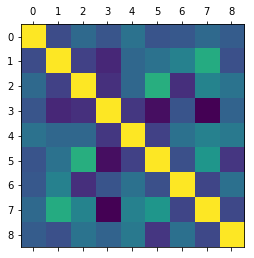

In [196]:
plt.matshow(df[AB_subset0].corr())

In [197]:
df[AB_subset0].corr()

,Absenteeism time in hours,Distance from Residence to Work,Age,Education,Son,Body mass index,Pet,Social drinker,Social smoker
Absenteeism time in hours,1.000000,-0.088363,0.065760,-0.046235,0.113756,-0.049719,-0.028277,0.065067,-0.008936
Distance from Residence to Work,-0.088363,1.000000,-0.145886,-0.259605,0.054230,0.113772,0.205941,0.452196,-0.075369
Age,0.065760,-0.145886,1.000000,-0.221882,0.056984,0.470688,-0.231226,0.213183,0.121738
Education,-0.046235,-0.259605,-0.221882,1.000000,-0.188622,-0.366884,-0.053554,-0.420013,0.032727
Son,0.113756,0.054230,0.056984,-0.188622,1.000000,-0.144150,0.108917,0.206376,0.156088
Body mass index,-0.049719,0.113772,0.470688,-0.366884,-0.144150,1.000000,-0.076103,0.323978,-0.196006
Pet,-0.028277,0.205941,-0.231226,-0.053554,0.108917,-0.076103,1.000000,-0.122780,0.105379
Social drinker,0.065067,0.452196,0.213183,-0.420013,0.206376,0.323978,-0.122780,1.000000,-0.111678
Social smoker,-0.008936,-0.075369,0.121738,0.032727,0.156088,-0.196006,0.105379,-0.111678,1.000000
